In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Find Class Imbalance

In [2]:
from common.src import resample as res

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
X, y = res.to_numpy_array(path)

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................{0: 1.9448173005219984, 1: 0.6730322580645162}


C:\Users\mmitk\Anaconda3\envs\pnenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [3]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [4]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [5]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 150, class_weights = class_weights)

Epoch 1/150
163/163 [==============================] - 59s 363ms/step - loss: 0.6367 - tp: 3348.0000 - fp: 2471.0000 - tn: 2745.0000 - fn: 1868.0000 - accuracy: 0.5841 - precision: 0.5754 - recall: 0.6419 - auc: 0.6458 - val_loss: 0.6613 - val_tp: 152.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 152.0000 - val_accuracy: 0.5625 - val_precision: 0.5714 - val_recall: 0.5000 - val_auc: 0.7188
Epoch 2/150
163/163 [==============================] - 54s 329ms/step - loss: 0.3913 - tp: 4296.0000 - fp: 973.0000 - tn: 4243.0000 - fn: 920.0000 - accuracy: 0.8185 - precision: 0.8153 - recall: 0.8236 - auc: 0.8981 - val_loss: 0.5126 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8125
Epoch 3/150
163/163 [==============================] - 51s 312ms/step - loss: 0.3326 - tp: 4420.0000 - fp: 793.0000 - tn: 4423.0000 - fn: 796.0000 - accuracy: 0.8477 - precision: 0.8479 - recall: 0.8474 -

Epoch 22/150
163/163 [==============================] - 51s 313ms/step - loss: 0.1738 - tp: 4856.0000 - fp: 363.0000 - tn: 4853.0000 - fn: 360.0000 - accuracy: 0.9307 - precision: 0.9304 - recall: 0.9310 - auc: 0.9802 - val_loss: 0.3912 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8945
Epoch 23/150
163/163 [==============================] - 53s 324ms/step - loss: 0.1761 - tp: 4835.0000 - fp: 384.0000 - tn: 4832.0000 - fn: 381.0000 - accuracy: 0.9267 - precision: 0.9264 - recall: 0.9270 - auc: 0.9795 - val_loss: 0.3399 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9492
Epoch 24/150
163/163 [==============================] - 52s 318ms/step - loss: 0.1695 - tp: 4875.0000 - fp: 340.0000 - tn: 4876.0000 - fn: 341.0000 - accuracy: 0.9347 - precision: 0.9348 - recall: 0.9346 - 

Epoch 43/150
163/163 [==============================] - 49s 302ms/step - loss: 0.1577 - tp: 4885.0000 - fp: 336.0000 - tn: 4880.0000 - fn: 331.0000 - accuracy: 0.9361 - precision: 0.9356 - recall: 0.9365 - auc: 0.9840 - val_loss: 0.3960 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8711
Epoch 44/150
163/163 [==============================] - 50s 308ms/step - loss: 0.1522 - tp: 4877.0000 - fp: 346.0000 - tn: 4870.0000 - fn: 339.0000 - accuracy: 0.9343 - precision: 0.9338 - recall: 0.9350 - auc: 0.9846 - val_loss: 0.4573 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8555
Epoch 45/150
163/163 [==============================] - 50s 306ms/step - loss: 0.1483 - tp: 4892.0000 - fp: 328.0000 - tn: 4888.0000 - fn: 324.0000 - accuracy: 0.9375 - precision: 0.9372 - recall: 0.9379 - 

Epoch 64/150
163/163 [==============================] - 50s 305ms/step - loss: 0.1414 - tp: 4921.0000 - fp: 298.0000 - tn: 4918.0000 - fn: 295.0000 - accuracy: 0.9432 - precision: 0.9429 - recall: 0.9434 - auc: 0.9870 - val_loss: 0.2886 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9609
Epoch 65/150
163/163 [==============================] - 50s 305ms/step - loss: 0.1351 - tp: 4930.0000 - fp: 292.0000 - tn: 4924.0000 - fn: 286.0000 - accuracy: 0.9446 - precision: 0.9441 - recall: 0.9452 - auc: 0.9881 - val_loss: 0.5571 - val_tp: 209.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 95.0000 - val_accuracy: 0.6562 - val_precision: 0.6471 - val_recall: 0.6875 - val_auc: 0.8164
Epoch 66/150
163/163 [==============================] - 50s 304ms/step - loss: 0.1488 - tp: 4913.0000 - fp: 307.0000 - tn: 4909.0000 - fn: 303.0000 - accuracy: 0.9415 - precision: 0.9412 - recall: 0.9419 -

Epoch 85/150
163/163 [==============================] - 50s 304ms/step - loss: 0.1305 - tp: 4949.0000 - fp: 270.0000 - tn: 4946.0000 - fn: 267.0000 - accuracy: 0.9485 - precision: 0.9483 - recall: 0.9488 - auc: 0.9887 - val_loss: 0.3130 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9492
Epoch 86/150
163/163 [==============================] - 49s 303ms/step - loss: 0.1261 - tp: 4949.0000 - fp: 260.0000 - tn: 4956.0000 - fn: 267.0000 - accuracy: 0.9495 - precision: 0.9501 - recall: 0.9488 - auc: 0.9893 - val_loss: 0.2912 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9492
Epoch 87/150
163/163 [==============================] - 50s 305ms/step - loss: 0.1340 - tp: 4945.0000 - fp: 267.0000 - tn: 4949.0000 - fn: 271.0000 - accuracy: 0.9484 - precision: 0.9488 - recall: 0.9480 - 

Epoch 106/150
163/163 [==============================] - 49s 303ms/step - loss: 0.1035 - tp: 4997.0000 - fp: 218.0000 - tn: 4998.0000 - fn: 219.0000 - accuracy: 0.9581 - precision: 0.9582 - recall: 0.9580 - auc: 0.9924 - val_loss: 0.3020 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9336
Epoch 107/150
163/163 [==============================] - 51s 310ms/step - loss: 0.1150 - tp: 4968.0000 - fp: 247.0000 - tn: 4969.0000 - fn: 248.0000 - accuracy: 0.9525 - precision: 0.9526 - recall: 0.9525 - auc: 0.9909 - val_loss: 0.2728 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9688
Epoch 108/150
163/163 [==============================] - 50s 307ms/step - loss: 0.1111 - tp: 4990.0000 - fp: 224.0000 - tn: 4992.0000 - fn: 226.0000 - accuracy: 0.9569 - precision: 0.9570 - recall: 0.9567

Epoch 127/150
163/163 [==============================] - 50s 304ms/step - loss: 0.1117 - tp: 4981.0000 - fp: 235.0000 - tn: 4981.0000 - fn: 235.0000 - accuracy: 0.9549 - precision: 0.9549 - recall: 0.9549 - auc: 0.9907 - val_loss: 0.1931 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9883
Epoch 128/150
163/163 [==============================] - 50s 305ms/step - loss: 0.1108 - tp: 4967.0000 - fp: 246.0000 - tn: 4970.0000 - fn: 249.0000 - accuracy: 0.9525 - precision: 0.9528 - recall: 0.9523 - auc: 0.9918 - val_loss: 0.2006 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9844
Epoch 129/150
163/163 [==============================] - 50s 307ms/step - loss: 0.1012 - tp: 5011.0000 - fp: 205.0000 - tn: 5011.0000 - fn: 205.0000 - accuracy: 0.9607 - precision: 0.9607 - recall: 0.9607

Epoch 148/150
163/163 [==============================] - 49s 303ms/step - loss: 0.1072 - tp: 4998.0000 - fp: 217.0000 - tn: 4999.0000 - fn: 218.0000 - accuracy: 0.9583 - precision: 0.9584 - recall: 0.9582 - auc: 0.9915 - val_loss: 0.1970 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9961
Epoch 149/150
163/163 [==============================] - 50s 307ms/step - loss: 0.1075 - tp: 4998.0000 - fp: 219.0000 - tn: 4997.0000 - fn: 218.0000 - accuracy: 0.9581 - precision: 0.9580 - recall: 0.9582 - auc: 0.9923 - val_loss: 0.1697 - val_tp: 304.0000 - val_fp: 0.0000e+00 - val_tn: 304.0000 - val_fn: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 150/150
163/163 [==============================] - 50s 306ms/step - loss: 0.1041 - tp: 5004.0000 - fp: 213.0000 - tn: 5003.0000 - fn: 212.0000 - accuracy: 0.9593 - precision: 0.9592 - recall: 

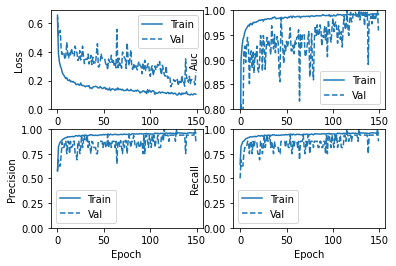

In [6]:
cnn.plot_history()

In [7]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.90      0.89      0.90       234
   PNEUMONIA       0.93      0.94      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

None


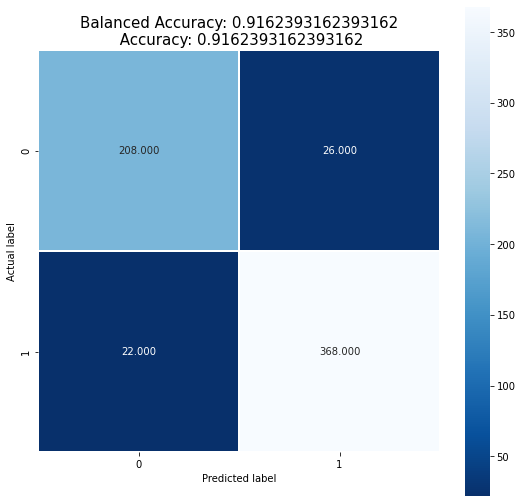

In [8]:
cnn.display_confusion_matrix(test_data_generator = test_set)